In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
datadir = "pythonquestions/"
answers = pd.read_csv(datadir+'Answers.csv',encoding = 'iso-8859-1')
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


In [6]:
answers = answers.drop(['Body'], axis=1)

In [7]:
answers.head()

,Id,OwnerUserId,CreationDate,ParentId,Score
0,497,50.0,2008-08-02T16:56:53Z,469,4
1,518,153.0,2008-08-02T17:42:28Z,469,2
2,536,161.0,2008-08-02T18:49:07Z,502,9
3,538,156.0,2008-08-02T18:56:56Z,535,23
4,541,157.0,2008-08-02T19:06:40Z,535,20


In [8]:
questions = pd.read_csv(datadir+'Questions.csv',encoding = 'iso-8859-1')

In [10]:
questions = questions.drop(['Body','Title'], axis=1)
questions.head()

,Id,OwnerUserId,CreationDate,Score
0,469,147.0,2008-08-02T15:11:16Z,21
1,502,147.0,2008-08-02T17:01:58Z,27
2,535,154.0,2008-08-02T18:43:54Z,40
3,594,116.0,2008-08-03T01:15:08Z,25
4,683,199.0,2008-08-03T13:19:16Z,28


(array([1.07595e+05, 2.32380e+04, 1.10480e+04, 4.50700e+03, 1.81400e+03,
        6.71000e+02, 2.20000e+02, 6.60000e+01, 1.50000e+01, 2.00000e+00]),
 array([0.        , 0.41655707, 0.83311415, 1.24967122, 1.6662283 ,
        2.08278537, 2.49934244, 2.91589952, 3.33245659, 3.74901367,
        4.16557074]),
 <a list of 10 Patch objects>)

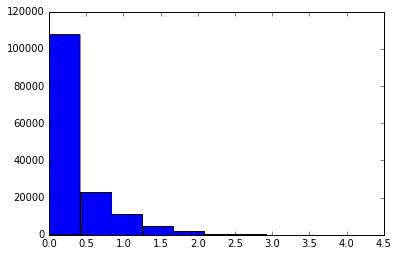

In [81]:
counts = answers[['Id','OwnerUserId']].groupby(['OwnerUserId']).agg(['count'])
counts = counts.as_matrix()
counts = counts.flatten()
counts = np.log10(counts)
plt.hist(counts)

In [84]:
sum=0
for item in counts:
    if item >= 2:
        sum=sum+1
print(sum/len(counts))

0.008191666219767255


In [41]:
len(counts)

149176

In [43]:
sum/len(counts)

0.04211133158148764

(array([5.1359e+04, 2.0205e+04, 1.2574e+04, 6.6090e+03, 2.8120e+03,
        1.1000e+03, 3.9000e+02, 1.2300e+02, 2.2000e+01, 4.0000e+00]),
 array([ 0.        ,  1.11004055,  2.22008111,  3.33012166,  4.44016221,
         5.55020276,  6.66024332,  7.77028387,  8.88032442,  9.99036498,
        11.10040553]),
 <a list of 10 Patch objects>)

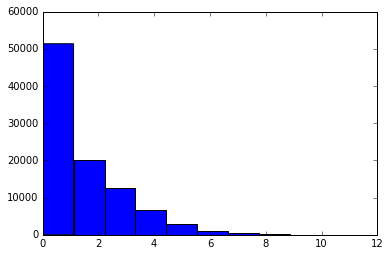

In [62]:
counts2 = answers[['Score','OwnerUserId']].groupby(['OwnerUserId']).agg(['sum'])
counts2 = counts2.as_matrix()
counts2 = counts2.flatten()
temp = []

for item in counts2:
    if item>0:
        temp.append(item)
temp = np.array(temp)
temp = np.log(temp)
plt.hist(temp)


In [76]:
sum=0
for item in temp:
    if item > np.log(50):
        sum=sum+1
print(sum/len(counts2))


0.04606639137662895


0.010693501964326982